In [1]:
!pip install PyMuPDF       # for fitz
!pip install wordcloud     # for WordCloud
!pip install matplotlib    # for matplotlib
!pip install transformers  # for transformers

In [2]:
# Text processing 
import fitz


# For wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Models for text summarization
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [3]:
pdf_doc=fitz.open('toughtimesneverlast.pdf')

In [4]:
print(f"Number of pages: {pdf_doc.page_count}")
print()
print(f"Metadata: {pdf_doc.metadata}")

Number of pages: 120

Metadata: {'format': 'PDF 1.4', 'title': 'Tough Times Never Last', 'author': 'Robert H. Schuller', 'subject': '', 'keywords': '', 'creator': 'Acrobat PDFMaker 6.0 for Word', 'producer': 'Acrobat Distiller 6.0 (Windows)', 'creationDate': "D:20050920025350+07'00'", 'modDate': "D:20050920025550+07'00'", 'trapped': '', 'encryption': None}


In [5]:
pdf_path = 'toughtimesneverlast.pdf'

# Open the PDF file
pdf_document = fitz.open(pdf_path)

# Initialize an empty string to store the concatenated text
concatenated_text = ""

# Loop through all pages and concatenate text
for page_number in range(pdf_document.page_count):
    page = pdf_document[page_number]
    text = page.get_text()
    
    # Concatenate text from each page
    concatenated_text += text

# Print the concatenated text
print(concatenated_text)
pdf_document.close()

Tough Times Never Last, But Tough People Do! 
Robert H. Schuller 
 
 
 
 
 
 
 
 
 
Tough Times Never Last, 
But Tough People Do! 
 
Robert H. Schuller 
 
 
 
More than 6 months on The New York Times Bestseller List! 
 
 
 
 
 
 
Here’s How You Can Be Tough Too! 
 
What is the secret ingredient of tough people that enables them to succeed?  Why do they 
survive the tough times when others are overcome by them?  Why do they soar when others 
sink? 
 
According to Robert Schuller, the difference between those who win and those who don’t, is 
the application of the powerful concept of ‘Possibility Thinking’.  Winners dare to dream.  
They commit themselves to it.  They dare to try, to take risk.  They believe ‘If it’s going to 
be, its up to me’.  They understand that failure is an event not a person.  They never quit. 
 
In this international bestseller Dr. Robert Schuller translates his philosophy of ‘Possibility 
Thinking’ into an action plan for success and demonstrates how to turn yo

In [6]:
def abstractive_summarization(text, max_length=300):
    # Load pre-trained T5 model and tokenizer
    model = T5ForConditionalGeneration.from_pretrained("t5-small")
    tokenizer = T5Tokenizer.from_pretrained("t5-small")

    # Tokenize and generate summary
    inputs = tokenizer("summarize: " + text, return_tensors="pt", max_length=max_length, truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=max_length, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

In [7]:
 # Perform abstractive summarization
summarized_text = abstractive_summarization(concatenated_text)

# Print the result
print("Original Text Length:", len(concatenated_text))
print("Summarized Text Length:", len(summarized_text))
print("\nSummarized Text:\n", summarized_text)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Original Text Length: 349065
Summarized Text Length: 284

Summarized Text:
 the difference between those who win and those who don’t, is the application of the powerful concept of ‘Possibility Thinking’. winners dare to dream. they commit themselves to it. they dare to try, to take risk. they understand that failure is an event not a person. they never quit.


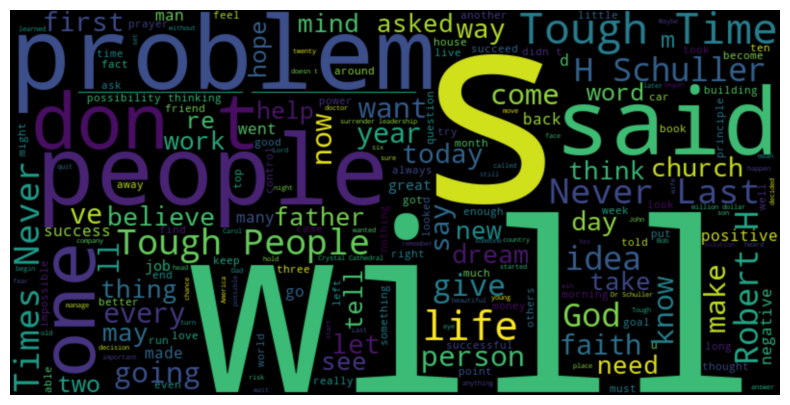

In [10]:
def generate_wordcloud(text):
    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bicubic')
    plt.axis('off')
    plt.show()

generate_wordcloud(concatenated_text)